<h2> Simulações: Capítulo 7

Vamos utilizar a biblioteca `control` do Python para simular o sistema de controle de velocidade da turbina eólica com o controlador PI.

In [2]:
!pip install control numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 1.6 MB/s eta 0:00:00


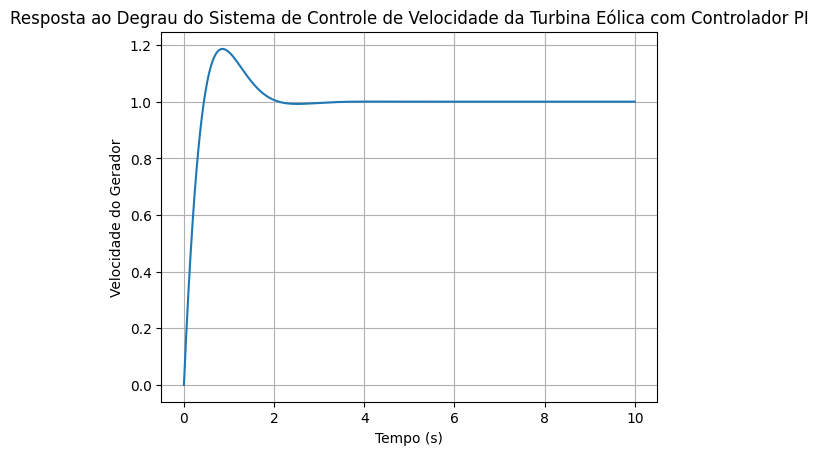

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do modelo simplificado
T = 5  # Constante de tempo
K = -7200  # Ganho
G = ctrl.TransferFunction([K], [T, 1])

# Controlador PI
Kp = -0.0025
Ki = -0.005
Gc = ctrl.TransferFunction([Kp, Ki], [1, 0])

# Sistema em malha fechada
sys = ctrl.feedback(Gc * G, 1)

# Simulação da resposta ao degrau
time = np.linspace(0, 10, 1000)
time_out, step_response = ctrl.step_response(sys, time)

# Plotar a resposta ao degrau
plt.figure()
plt.plot(time_out, step_response)
plt.title('Resposta ao Degrau do Sistema de Controle de Velocidade da Turbina Eólica com Controlador PI')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade do Gerador')
plt.grid()
plt.show()

Vamos considerar um sistema de controle em malha fechada com a seguinte função de transferência:

$$ T(s) = \frac{K(s + 1)(s + 3)}{s(s + 2)(s + 3) + K(s + 1)} $$

A equação característica é:

$$ 1 + K \frac{(s + 1)}{s(s + 2)(s + 3)} = 0 $$

Podemos utilizar a função `rlocus` para gerar o gráfico do lugar das raízes, e a função `rlocfind` para encontrar os valores de $K$ correspondentes a pares de raízes complexas. A função `residue` é utilizada para expansões em frações parciais de funções racionais.

**Obtendo o Gráfico do Lugar das Raízes**

Primeiro, obtemos a equação característica na forma:

$$ 1 + KG(s) = 1 + K \frac{p(s)}{q(s)} = 0 $$

Depois, utilizamos a função `rlocus` para gerar o gráfico do lugar das raízes.

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


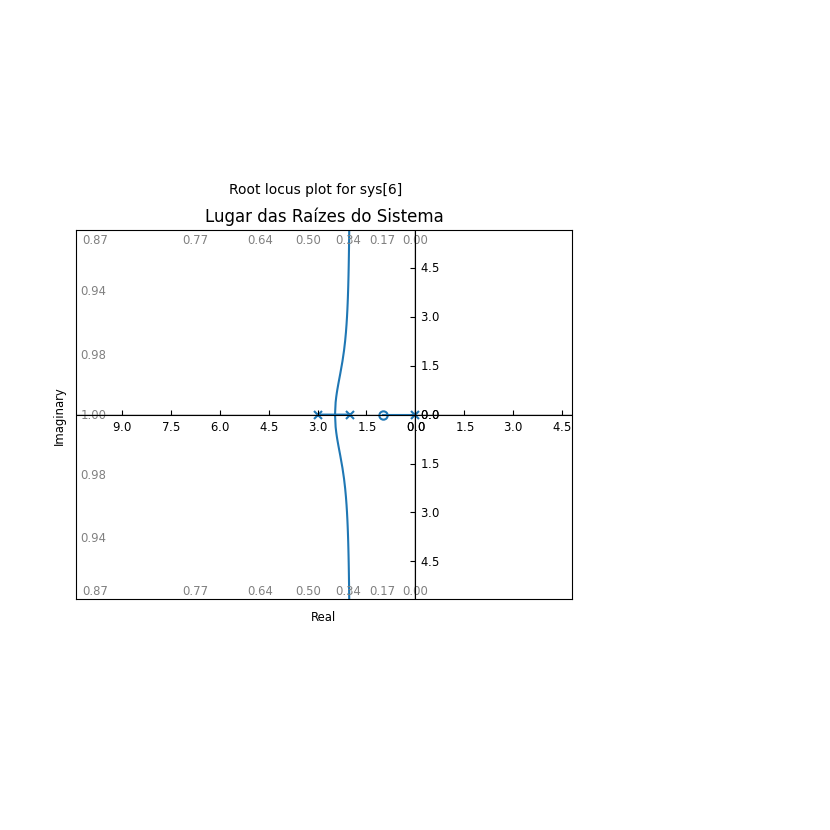

Valor de K: [[-2.05053099-4.32275631j -2.05053099+4.32275631j -0.89893803+0.j        ]]
Localizações das raízes: [20.5775]
Mudança nas raízes (Δri): [1.028875]


/tmp/ipython-input-4-3169116371.py:18: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  K_value, rloc_points = ctrl.root_locus(sistema, kvect=[20.5775], plot=False)
/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/tmp/ipython-input-4-3169116371.py:27: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  _, rloc_points_modificado = ctrl.root_locus(sistema, kvect=[K_modificado], plot=False)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir a função de transferência do sistema
numerador = [1, 1]
denominador = [1, 5, 6, 0]
sistema = ctrl.TransferFunction(numerador, denominador)

# Gerar o gráfico do lugar das raízes
plt.figure()
ctrl.root_locus(sistema, plot=True)
plt.title('Lugar das Raízes do Sistema')
plt.grid()
plt.show()

# Encontrar o valor de K para um par de raízes complexas
K_value, rloc_points = ctrl.root_locus(sistema, kvect=[20.5775], plot=False)
print(f"Valor de K: {K_value}")
print(f"Localizações das raízes: {rloc_points}")

# Sensibilidade das raízes às variações em K
K_original = 20.5775
K_modificado = K_original * 1.05

# Gerar o gráfico do lugar das raízes para K modificado
_, rloc_points_modificado = ctrl.root_locus(sistema, kvect=[K_modificado], plot=False)

# Calcular a mudança nas raízes
delta_ri = rloc_points_modificado - rloc_points
print(f"Mudança nas raízes (Δri): {delta_ri}")

**Sistema de Controle de Disco**

O sistema de controle de disco é mostrado na Figura 7.60, onde utilizamos um controlador PD. A função de transferência em malha fechada do sistema é:

$$ T(s) = \frac{Gc(s) G1(s) G2(s)}{1 + Gc(s) G1(s) G2(s)} $$

onde $ Gc(s) $ é o controlador, $ G1(s) $ é o motor e $ G2(s) $ é a carga.

A função de transferência $ Gc(s)G1(s)G2(s) $ é dada por:

$$ Gc(s)G1(s)G2(s) = \frac{5000(Kp + KDs)}{s(s + 20)(s + 1000)} $$

Vamos selecionar o controlador PD $ Gc(s) = Kp + KDs $ de forma que atenda às especificações desejadas.

**Projeto do Controlador PD**

Primeiro, selecionamos $ z = \frac{Kp}{KD} $ e esboçamos o lugar das raízes em função de $ KD $. Supondo que $ z = 1 $, temos:

$$ Gc(s)G1(s)G2(s) = \frac{5000KD(s + 1)}{s(s + 20)(s + 1000)} $$

Vamos obter o lugar das raízes para diferentes valores de $ KD $ e ajustar os parâmetros para atender às especificações de desempenho.

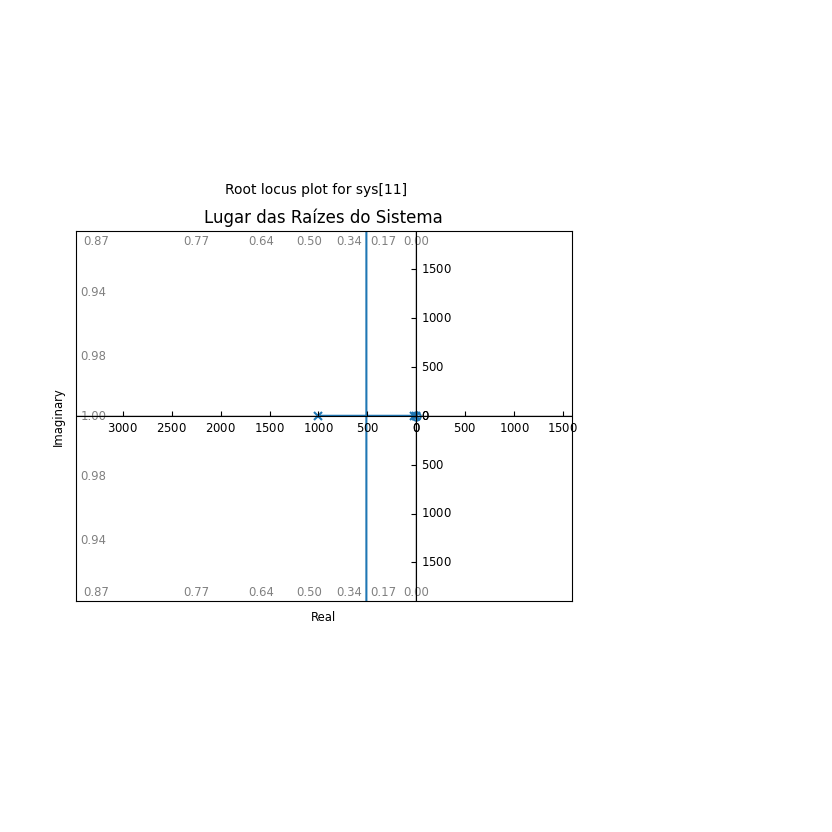

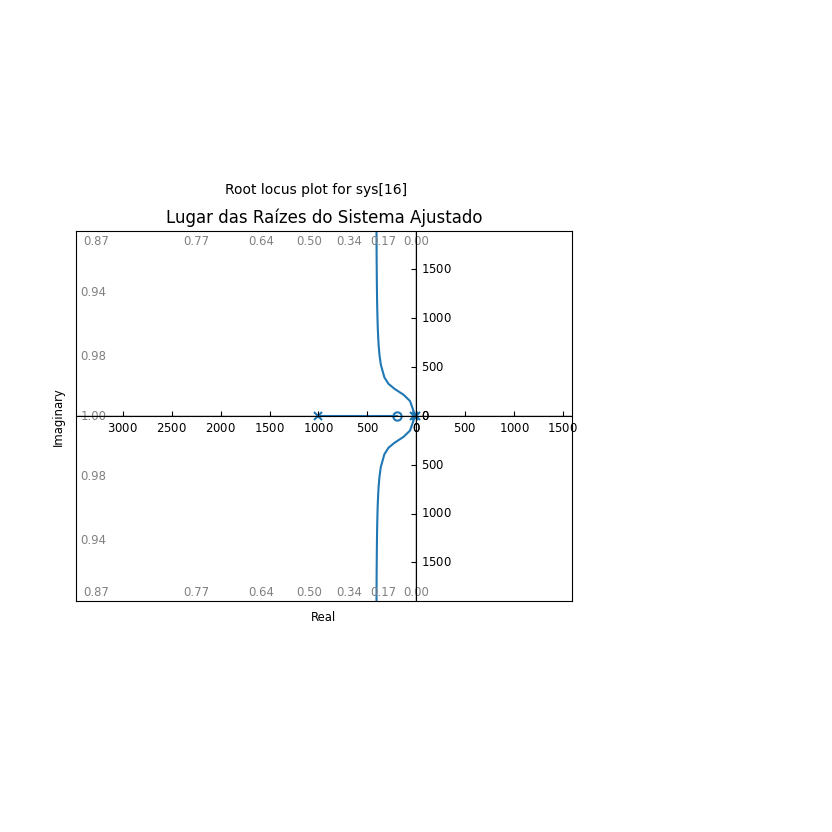

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do sistema
G1 = ctrl.TransferFunction([5000], [1, 20, 0])
G2 = ctrl.TransferFunction([1], [1, 1000])

# Controlador PD
Kp = 1
KD = 1
Gc = ctrl.TransferFunction([KD, Kp], [1])

# Sistema em malha fechada
sys_open = Gc * G1 * G2
sys_closed = ctrl.feedback(sys_open, 1)

# Plotar o lugar das raízes do sistema
plt.figure()
ctrl.root_locus(sys_open)
plt.title('Lugar das Raízes do Sistema')
plt.grid()
plt.show()

# Ajustar os parâmetros do controlador PD
Kp = 100
KD = 0.5
Gc = ctrl.TransferFunction([KD, Kp], [1])

# Sistema ajustado em malha fechada
sys_open_adjusted = Gc * G1 * G2
sys_closed_adjusted = ctrl.feedback(sys_open_adjusted, 1)

# Plotar o lugar das raízes do sistema ajustado
plt.figure()
ctrl.root_locus(sys_open_adjusted)
plt.title('Lugar das Raízes do Sistema Ajustado')
plt.grid()
plt.show()